<a href="https://colab.research.google.com/github/nurcanyaz/deep_learning/blob/main/ANN_UYGULAMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from os import spawnl
# İmport library

import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import load_model, Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model

import matplotlib.pyplot as plt
import numpy as np

import warnings
from warnings import filterwarnings
warnings.filterwarnings("ignore", category = DeprecationWarning)
warnings.filterwarnings("ignore", category = FutureWarning)
warnings.filterwarnings("ignore", category = UserWarning)
filterwarnings("ignore")

In [6]:
# Mnist veri setinin yüklenmesi

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [8]:
print("Eğitim setinin boyutu:", x_train.shape, y_train.shape)

Eğitim setinin boyutu: (60000, 28, 28) (60000,)


In [9]:
print("Test setinin boyutu:", x_test.shape, y_test.shape)

Test setinin boyutu: (10000, 28, 28) (10000,)


In [12]:
num_labels = len(np.unique(y_train))

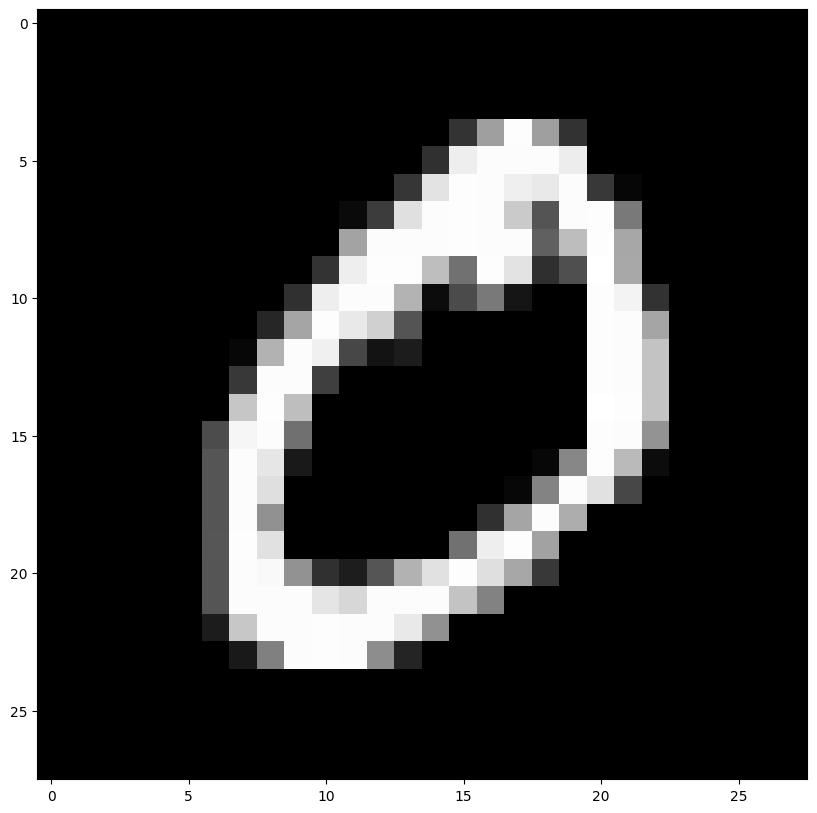

In [21]:
# Veri setinden tek veri getirme

plt.figure(figsize=(10,10))
plt.imshow(x_train[1], cmap='gray');

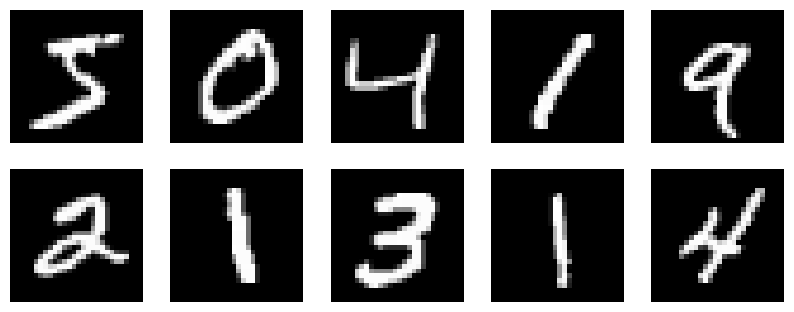

In [22]:
# Veri setinden 10 adet veri getirilmesi
def visualize_img(data):
  plt.figure(figsize=(10,10))
  for n in range(10):
    ax = plt.subplot(5,5,n+1)
    plt.imshow(x_train[n], cmap='gray')
    plt.axis('off')

visualize_img(x_train)